In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import pickle

%matplotlib inline

In [2]:
! git clone https://github.com/vicky-nike/try.git

Cloning into 'try'...
remote: Enumerating objects: 9913, done.
remote: Counting objects: 100% (9913/9913), done.
remote: Compressing objects: 100% (9912/9912), done.
remote: Total 9913 (delta 1), reused 9912 (delta 0), pack-reused 0
Receiving objects: 100% (9913/9913), 55.32 MiB | 29.79 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [0]:
DATADIR = "try/Dataset"
Categories = ["Negative", "Positive"]

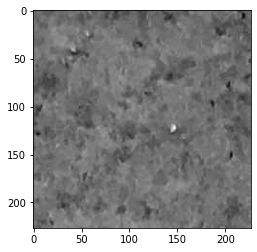

In [4]:
for category in Categories:
    path = os.path.join(DATADIR, category) #path to crack and non-crac dir
    #For showing sample image
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(227, 227)


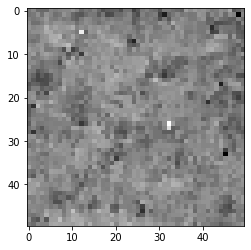

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap= 'gray')
plt.show()

training_data = []

In [0]:
def create_training_data():
    for category in Categories:
        path = os.path.join(DATADIR, category) 
        class_num = Categories.index(category) 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])         
            except Exception as e:
                pass        #If there is any broken images it will be neglected

create_training_data()

In [8]:
print(len(training_data))        

10000


In [0]:
random.shuffle(training_data)      

In [10]:
# Below we are checking if the datas are labeled or not
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
1
0
0
1
1
1


In [0]:
X = [] 
y = [] 

In [0]:
#appending the features and labels value to the empty list
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)    

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = X.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3)))  
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64)) 
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss= "binary_crossentropy", optimizer="adam", metrics=['accuracy'])

model.fit(X, y, batch_size=32, epoch=20, validation_split= 0.1)   # spliting the validation into 10%

282/282 [==============================] - 44s 154ms/step - loss: 0.1510 - accuracy: 0.9346 - val_loss: 0.0578 - val_accuracy: 0.9880


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

drive/  sample_data/  try/  X.pickle  y.pickle


In [0]:
cd drive

/content/drive


In [0]:
ls

'My Drive'/


In [0]:
cd My Drive

/content/drive/My Drive


In [0]:
ls

 19996.jpg                   'DL week 2.gdoc'
 19999.jpg                   'DL week 3.gdoc'
 anna.txt                    'DL week 4.gdoc'
'App for Fisheries.gslides'  'Getting started.pdf'
 BOI/                        'input image.ipynb'
'Colab Notebooks'/           'Janitor Satellite .gdoc'
'Concrete Crack Images'/     'Pros and cons.gsheet'
'DL C2 week 1.gdoc'          'R&D.gsheet'
'DL C2 week 2.gdoc'          'SC M1.gdoc'
'DL C2 week 3.gdoc'          'SC M2.gdoc'
'DL C3.gdoc'                 'Simple RNN.ipynb'
'DL C4 Week 1.gdoc'          'Suresh Kumar 29 September.pdf'
'DL week 1.gdoc'             'To-do list.gsheet'


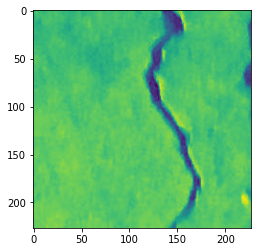

Crack Detected


In [0]:
import cv2

img = cv2.imread('19996.jpg', cv2.IMREAD_GRAYSCALE)

def prepare(filepath):
  img_array1 = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))
  return new_array1.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

prediction = model.predict([prepare('19996.jpg')])

plt.imshow(img)
plt.show()

if prediction>0.5:
  print("Crack Detected")
else:
  print("No Crack detected")